In [1]:
try:
    # install for jupyterlite if needed
    import piplite
    print('installing piplite packages... This may take up to ~5 minutes. If still running, please try refreshing the page.')
    await piplite.install(['mathpad', 'nbformat>=5.6', 'ipywidgets>=7,<8'])
    print('piplite packages installed and ready to go!')
    in_jupyterlite = True

except (ImportError, SyntaxError):
    # not running in jupyterlite
    in_jupyterlite = False

from mathpad import *
from typing import List


# Welcome to MathPad

MathPad is a a Python library that makes it easy to solve engineering, science and maths problems.

MathPad is ideal for engineering students and academics seeking to easily check their work or better understand the mathematical models and equations they are working with.

Features:
- Intuitive interface for those unfamiliar with Python
- Easy-to-use construction of systems of equations - goodbye hand calculations!
- Self-explanatory latex output
- Automatic dimensionality validity checking
- Automatic unit conversion
- Growing library of equations and constants to utilize

This notebook will serve as a tour of the major features of `mathpad`.

For more complex, problem-driven examples, please check out the other `.ipynb` files in this directory by accessing the menu to the left.

# Vals

In `mathpad`, the core objects you will be working with are `Val`s.

`Val`s consist of `units` and an `expr` (mathematical expression):

In [2]:
print("Val:")
x = 5 * meters / second
display(x)

print("Val.expr:")
display(x.expr)

print("Val.units:")
display(x.units)

Val:


5 meters/second

Val.expr:


5

Val.units:


meter 
──────
second

Units exposed by mathpad, such as `meters`, `volts`, or `grams`, are actually just `Val`s with an `expr == 1`

In [3]:
meters, volts, grams

(1 meters, 1 volts, 1 grams)

# Complex Numbers

Complex and imaginary numbers are supported out of the box, taking the form: (`a + bj`)

In [4]:
imaginary = 1j * meters
display(imaginary)

complex = 1 + 1j * volts
display(complex)

I meters

1.0 + I volts

# Dimensionality

A `Val`'s units always have a corresponding `dimension` attribute that describes the dimensionality of the expression:

In [5]:
x.dimension

length
──────
 time 

This dimensionality is used to determine the validity of expressions and equations.

If an expression is not dimensionally valid, a `DimensionError` will be raised.

For example, `1 meter` cannot be added to `1 volt`:

In [6]:
try:
    1 * meter + 1 * volt
    
except DimensionError as err:
    print(type(err), err)

<class 'mathpad.val.SumDimensionsMismatch'> [Dimension(length, L): 1 meters] "+" [Dimension(voltage, U): 1 volts]


The full list of dimensionality rules are as follows:
- Added or subtracted `Val`s must have *equivalent* dimensionality
- The left-hand-side and right-hand-side of an `Equation` must have *equivalent* dimensionality
- Exponents must always be *dimensionless*. Angles are *dimensionless*.

This means that angles can be used as exponents:

In [7]:
e ** (pi * i)

-1.0 + 0.e-12*I

# Defining Vals

`Val`s can be either constants, variables, or functions of other `Val`s.

## Constants

Constants are defined as combinations of numeric primitives and unit expressions:

In [8]:
print("Examples of constants:")
display(5 * meters / second)
display(0.5 * second)

Examples of constants:


5 meters/second

0.5 seconds

# Symbolic Variables

Symbolic Variables are defined with a symbol (denoted by a string) multiplied by a unit expression.

Naming symbols is pretty intuitive, and usually they convert to LaTeX easily:

In [9]:
print("Examples of variables:")

a = "alpha" * meters / s ** 2
display(a)

theta2 = "theta2" * radians
display(theta2)

phi_xyz = "phi_xyz^abc" * rad / s
display(phi_xyz)

zeta = "zeta_1,2^15" * meters
display(zeta)

Examples of variables:


alpha meters/second**2

theta2 radians

phi_xyz^abc radians/second

zeta_1,2^15 meters

You can also specify LaTeX directly in the symbol if you need more control:

In [10]:
beta = "\\vec{\\text{beta}^{a,b}_{c,d}}" * radians
beta

\vec{\text{beta}^{a,b}_{c,d}} radians

# Expressions

Expressions are defined via arithmetic expressions of `Vals`.

In [11]:
r = zeta * e ** theta2
r

zeta_1,2^15*exp(theta2) meters

The most common variable to utilise in an expression definition is `t seconds`.

This variable is defined automatically by `mathpad` and is immediately available when you `import *`

In [12]:
v = a * t
v

alpha*t meters/second

Note that the units of the expression are auto-calculated, and that in multiplication, numeric literals are assumed to be *dimensionless*.

This may lead to confusing behaviour when defining functional expressions. For example:

In [13]:
v_fn = (5 * t) * (meters / second)
v_fn

5*t meters

To get around this, the `Val.re()` ("replace units") function is recommended.

Note that this function essentially sidesteps dimensionality checking and should be done with care.

Ideally, most of your expressions are solely made up of operations between symbolic variable `Vals`.

In [14]:
v_fn2 = (5 * t).re(meters / second)
v_fn2

5*t meters/second

## Symbolic Functions

<a name="symbolic-functions"></a>

It is a common need to define functions a Val that is some unknown function of at least one other symbol.

These can be defined similarly to variables, but with parenthesis specifying the inputs to the functions:

In [15]:
print("Symbolic Functions:")

y = "y(t)" * meters
print(f"{y} = ")
display(y)

f = "f(a, zeta, theta2)" * N
print(f"{f} = ")
f

Symbolic Functions:
y(t) meters = 


y(t) meters

f(alpha, zeta_1,2^15, theta2) newtons = 


f(alpha, zeta_1,2^15, theta2) newtons

Note that symbolic functions of just time (such as `y(t)` above) do not display the dependency on `t` in their latex output, as this often makes larger physics expressions difficult to read.

## Equations

Equations can be defined with the `==` operator. This returns an `Equation` object rather than a `bool`.

As mentioned above, the units on the left and right hand side of the equation must have *equivalent* dimensionality.

If one of the sides is just a number (`int`, `float` or `complex`), its units are assumed to be the same as the other side.

In [16]:
eqn = y == v_fn
eqn

y(t) = 5*t meter

Equations can be evaluated for their truthiness with the `Equation.eval()` function.

Currently this function will return `False` if the truthiness of the equation cannot be adequately evaluated.

This is the case if there are any Symbolic `Val`s in the equation that can't be cancelled out.

In the future an `Equation.Unevaluable()` error will be raised instead.

In [17]:
print(eqn, '?', eqn.eval())

const_eqn = (5 * meters == 5)
print(const_eqn, '?', const_eqn.eval())

y(t) = 5*t meter ? False
5 = 5 meter ? True


### Constructor Library

A bunch of equations and value constructors are provided for easy use.

When `display()`-ed, each constructor will display the equation / value in terms of its function argument names.

In [18]:
from mathpad.elec import ohms_law, kerchoffs_current_law, kerchoffs_voltage_law, resistance_resistivity
from mathpad.mech import euler_lagrange, kinetic_energy, elastic_energy, gravitational_energy, euler_lagrange, impulse_momentum

impulse_momentum

### Custom Constructors

You can make custom constructors that aren't in the library too with the `@mathpad_constructor` decorator.

It is recommended you make arguments keyword arguments so that the must be specified when calling the function. This aids in readability for newcomers.

In [19]:
@mathpad_constructor
def my_epic_equation(
    # X[] must wrap your args for correct typing with Vals
    A: X[Area],
    x: X[Length],
    y: X[Length]
):
    return A == x * y

my_epic_equation

## Algebra
MathPad provides the following algebraic functions:
- `subs()`
- `factor()`
- `expand()`
- `simplify()`

More will be implemented in the future, but usually usage of `simplify()` and `subs()` is all you need.

### `subs()`

Substitutes `Val`s for others. Often used to plug in constants for symbolic `Val`s.

In [20]:
print("subs() examples:\n================\n")

print(f"v_fn: {v_fn}.\nSubbing in {t == 5}:")
display(subs(v_fn, {t: 5}))

print(f"eqn: {eqn}.\nSubbing in {t == 0.1}:")
display(subs(eqn, {t: 0.1}))

subs() examples:

v_fn: 5*t meters.
Subbing in t = 5 second:


25 meters

eqn: y(t) = 5*t meter.
Subbing in t = 0.1 second:


y(0.1) = 0.5 meter

### `factor()`

Takes a polynomial and factors it into irreducible factors over the rational numbers.

See the underlying [`sympy.factor()`](https://docs.sympy.org/latest/tutorials/intro-tutorial/simplification.html#factor) function for more details:

In [21]:
print("factor() examples:\n==================\n")

x = "x" * rad

print("Example 1")
eg1 = (cos(x)**2 + 2*cos(x)*sin(x) + sin(x)**2) * v_fn
display(eg1)
print('factors to:')
display(factor(eg1))

print("Example 2")
eg2 = x**3 - x**2 + x - 1
display(eg2)
print('factors to:')
display(factor(eg2))


factor() examples:

Example 1


5*t*(sin(x)**2 + 2*sin(x)*cos(x) + cos(x)**2) meters

factors to:


5*t*(sin(x) + cos(x))**2 meters

Example 2


x**3 - x**2 + x - 1 radians**3

factors to:


(x - 1.0)*(x**2 + 1.0) radians**3

### `expand()`

Expands an expression, undoing any factorization. This usually makes the output more verbose, although in some cases it can result in cancellation, leading to a smaller output.

See the underlying [`sympy.expand()`](https://docs.sympy.org/latest/tutorials/intro-tutorial/simplification.html#expand) function for more details:

In [22]:
print("factor() examples:\n==================\n")

print("Example 1")
eg1 = ((x + 1)**2) * v_fn
display(eg1)
print('expands to:')
display(expand(eg1))

print("Example 2")
eg2 = (x + 2)*(x - 3)
display(eg2)
print('expands to:')
display(expand(eg2))


print("Example 3")
eg3 = (x + 1)*(x - 2) - (x - 1)*x
display(eg3)
print('expands to:')
display(expand(eg3))

factor() examples:

Example 1


5*t*(x + 1.0)**2 meter*radians**2

expands to:


5*t*x**2 + 10*t*x + 5*t meter*radians**2

Example 2


(x - 3.0)*(x + 2.0) radians**2

expands to:


x**2 - x - 6 radians**2

Example 3


-x*(x - 1.0) + (x - 2.0)*(x + 1.0) radians**2

expands to:


-2 radians**2

### `simplify()`

Attempts simplification by any combination of the algebraic functions available to sympy.

See the underlying [`sympy.simplify()`](https://docs.sympy.org/latest/tutorials/intro-tutorial/simplification.html) function for more details

In [23]:
print("simplify() examples:\n====================\n")

print("Example 1: Trig Identity")
eg1 = (sin(theta2)**2 + cos(theta2)**2) * v_fn
display(eg1)
print('simplifies to:')
display(simplify(eg1))

print("Example 2: Polynomial Fraction")
eg2 = (theta2**3 + theta2**2 - theta2 - 1) / (theta2**2 + 2*theta2 + 1)
display(eg2)
print('simplifies to:')
display(simplify(eg2))

simplify() examples:

Example 1: Trig Identity


5*t*(sin(theta2)**2 + cos(theta2)**2) meters

simplifies to:


5*t meters

Example 2: Polynomial Fraction


(theta2**3 + theta2**2 - theta2 - 1.0)/(theta2**2 + 2*theta2 + 1.0) radians

simplifies to:


theta2 - 1 radians

## Solving

MathPad provides the ability to solve equations and systems of equations with ease, provided they are solveable.

This is done by using the `solve()` function. This function takes a list of equations and an equivalent list of symbolic `Val`s to solve for. The length of the list of equations must be greater than or equal to the length of list of unknowns, otherwise solving is impossible.

The output of the `solve()` function is a list of `Solutions`. Each `Solution` is essentially a `dict` mapping unknowns `Val`s passed to `solve_for` to their respective solution `Val`.

In [24]:
a2 = "a^2" * m**2
b = "b" * m
c = "c" * m

eqn = c**2 == a2 + b**2
display(eqn)

print(f"Solving {eqn} for {a2} ...")
solutions = solve([eqn], [a2])
print(f"Solutions found: {solutions}")
solution = solutions[0]
print("Solution #1 for a^2 =")
display(a2 == solution[a2])

c**2 = a^2 + b**2 meter**2

Solving c**2 = a^2 + b**2 meter**2 for a^2 meters**2 ...
Solutions found: [Solution( a^2 = -b**2 + c**2 meters**2 )]
Solution #1 for a^2 =


a^2 = -b**2 + c**2 meter**2

### Solving Systems of Equations
`solve()` takes a list of equations, making it simple to solve systems of equations:

In [25]:
x = "x" * N
y = "y" * N
z = "z" * N

system_of_equations = [
    y/12 + z == 12,
    x/2 - y + 132*z == 42,
    pi*x - z/pi == -96,
]

print("Solving system of equations:")
for eqn in system_of_equations:
    display(eqn)

sln = solve(system_of_equations, [x, y, z])[0]

print("Solution:")
for val, result in sln.items():
    display(val == result.eval())

Solving system of equations:


0.0833333*y + z = 12 newton

0.5*x - y + 132*z = 42 newton

3.14159*x - 0.3183z = -96 newton*radian

Solution:


x = -30.4162 newton

y = 127.233 newton

z = 1.39728 newton

Note that you can solve for `Val` expressions as well, not just symbols:

In [26]:
a = "a" * m
b = "b" * m
c2 = "c2" * m**2

c_inv = 1 / sqrt(c2)

eqn = c2 == a**2 + b**2
print("Solving")
display(eqn)
print("for")
display(c_inv)

solutions = solve([eqn], [c_inv])
assert len(solutions) == 2

print("Solution #1")
display(c_inv == solutions[0][c_inv])

print("Solution #2")
display(c_inv == solutions[1][c_inv])

Solving


c2 = a**2 + b**2 meter**2

for


c2**(-0.5) 1/meters

Solution #1


c2**(-0.5) = -(1/(a**2 + b**2))**0.5 1/meter

Solution #2


c2**(-0.5) = (1/(a**2 + b**2))**0.5 1/meter

## Efficient, large-scale evaluation

Often times you will come to an answer of a `Val` which is a function of many other symbolic `Val`s.

In order to test and visualize your solution, you may want to calculate the results for a range of different inputs.

You could use `subs()` over and over again in order to get the resulting value for each set of inputs, but this is computationally expensive.

A more efficient way to do this would be by converting the `Val` to a numpy-compatible function using `as_numpy_func()`, and then calling it with all the inputs at once.

This will result in using `numpy`'s C backend for doing all the required computations, rather than significantly slower sympy code.

In [27]:
import numpy as np

sln2_c_inv = solutions[1][c_inv]
print("Evaluating:")
display(c_inv == sln2_c_inv)

evaluate_a_with_numpy = as_numpy_func(sln2_c_inv)

print("Evaluating (scalar input) with b = 1m, a = 4m:")
display(c_inv == evaluate_a_with_numpy({ b: 1, a: 4 }))


print("Evaluating (list input) with b = [1, 2, 3] m, a = [4, 5, 6] m:")
display(evaluate_a_with_numpy({ b: [1, 2, 3], a: [4, 5, 6] }))


print(f"Evaluating (50 million el np.array inputs) with:")
b_arr = np.random.random(50_000_000)
a_arr = np.random.random(50_000_000)
print(f"b = {b_arr} (shape={b_arr.shape}) m, and")
print(f"a = {a_arr} (shape={b_arr.shape}) m:")
res = evaluate_a_with_numpy({ b: b_arr, a: a_arr })
print(f"Result: {res} (shape={res.shape}) m")
del a_arr, b_arr, res

Evaluating:


c2**(-0.5) = (1/(a**2 + b**2))**0.5 1/meter

Evaluating (scalar input) with b = 1m, a = 4m:


c2**(-0.5) = 0.242536 1/meter

Evaluating (list input) with b = [1, 2, 3] m, a = [4, 5, 6] m:


array([0.24253563, 0.18569534, 0.1490712 ])

Evaluating (50 million el np.array inputs) with:
b = [0.78956136 0.23112849 0.1559791  ... 0.92933114 0.4069253  0.57102495] (shape=(50000000,)) m, and
a = [0.42842448 0.42792548 0.6974274  ... 0.88422236 0.6506857  0.75806954] (shape=(50000000,)) m:
Result: [1.11320571 2.05611386 1.3992729  ... 0.7795614  1.30301584 1.0536601 ] (shape=(50000000,)) m


## Calculus

The `diff()` and `integral()` allow you to do calculus easily:

In [28]:
y = "y(t)" * m
_y = (t**3 / 3).re(m)
eqn = y == _y
display(eqn)

print("Derivative of y:")
display(
    diff(y) == diff(_y)
)

print("Double-Derivative of y:")
display(
    diff(y, 2) == diff(_y, 2)
)

print("Indefinite Integral of y:")
display(
    integral(y) == integral(_y)
)

print("Definite Integral of y from t=1 to t=2:")
display(
    integral(y, between=(1, 2)) == integral(_y, between=(1, 2))
)

y(t) = 0.333333*t**3 meter

Derivative of y:


Derivative(y(t), t) = t**2 meter/second

Double-Derivative of y:


Derivative(y(t), (t, 2)) = 2*t meter/second**2

Indefinite Integral of y:


Integral(y(t), t) = 0.0833333*t**4 meter*second

Definite Integral of y from t=1 to t=2:


Integral(y(t), (t, 1, 2)) = 1.25 meter*second

By default, the `diff()` and `integral()` functions are `wrt=t`, as this is the most common use-case.

So if needed, specify `wrt=x` instead where `x` is a symbolic `Val`: 

In [29]:
x = "x" * m
y = "y(x)" * m
_y = (x**3 / 3).re(m)
eqn = y == _y
display(eqn)

print("Derivative of y:")
display(
    diff(y, wrt=x) == diff(_y, wrt=x)
)

print("Double-Derivative of y:")
display(
    diff(y, 2, wrt=x) == diff(_y, 2, wrt=x)
)

print("Indefinite Integral of y:")
display(
    integral(y, wrt=x) == integral(_y, wrt=x)
)

print("Definite Integral of y from t=1 to t=2:")
display(
    integral(y, wrt=x, between=(1, 2)) \
    == integral(_y, wrt=x, between=(1, 2))
)

y(x) = 0.333333*x**3 meter

Derivative of y:


Derivative(y(x), x) = x**2 1

Double-Derivative of y:


Derivative(y(x), (x, 2)) = 2*x 1/meter

Indefinite Integral of y:


Integral(y(x), x) = 0.0833333*x**4 meter**2

Definite Integral of y from t=1 to t=2:


Integral(y(x), (x, 1, 2)) = 1.25 meter**2

## Simulating Systems of Differential Equations

When working with systems of differential equations, it can be helpful to run a simulation to determine the validity of your model. MathPad offers the `simulate_dynamic_system()` function to assist with this.

To demonstrate its use, we will be simulating the motion of a simple pendulum in the diagram below. Note that this model doesn't include any damping forces such as friction and air resistance, so it will oscillate forever.

![Simple Pendulum Problem Diagram](imgs/simple_pendulum.png)

We will be skipping the solving part of this problem and get right into simulating.

Derivative(theta(t), (t, 2)) = -g*sin(theta(t))/l radian/second**2

Solving subbed Equations...
Solving finished.
Simulating from t=0 to t=10 with a max_step of 0.01.


  0%|          | 0/10 [00:00<?, ?it/s]

Simulation finished. Plotting...


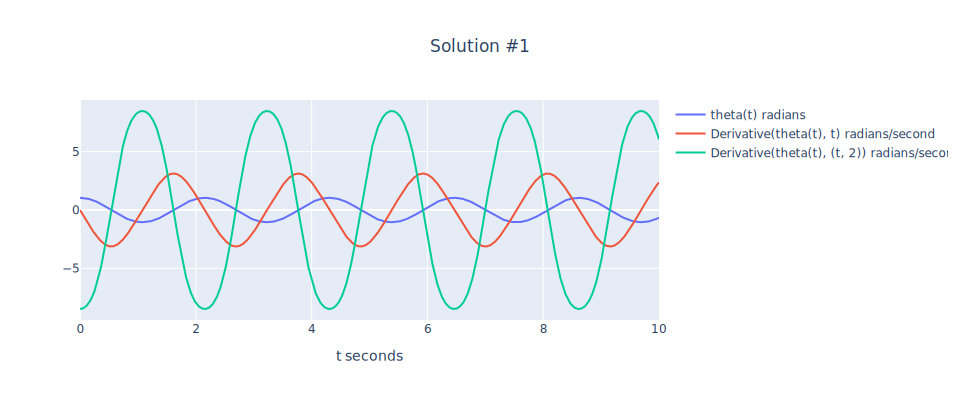

In [30]:
from mathpad import *
from mathpad.mech import gravitational_energy, kinetic_energy

theta = "theta(t)" * rad
g = "g" * m/s**2
l = "l" * m

eqn = diff(theta, 2) == -g/l * sin(theta)
display(eqn)

sim_data = simulate_dynamic_system(
    [eqn],
    x_final=10, max_step=0.01,
    substitute={ g: 9.8, l: 1 },
    initial_conditions={ theta: pi/3, diff(theta): 0 },
    record=[theta, diff(theta), diff(theta, 2)],
    plot_static=not in_jupyterlite
)

The `simulate_dynamic_system()` function returns a list of `(x, record_data)` tuples, where `x` is the variable that is being differentiated and `record_data` is a list of values that represent what was passed in for `record`.

In this case `x = t`, and `record_data = [theta, diff(theta), diff(theta, 2)]`.

You can use this data to produce your own plots / animations, or for further analysis with `scipy` or `pandas` etc...

In [31]:
for time, (theta, dtheta, ddtheta) in sim_data[:4]:
    print(f"t={time:.6f}, s: theta={theta:.2f} rad, dtheta={dtheta:.2f} rad/s, ddtheta={ddtheta:.2f} rad/s^2")
print('...')

t=0.000000, s: theta=1.05 rad, dtheta=0.00 rad/s, ddtheta=-8.49 rad/s^2
t=0.000001, s: theta=1.05 rad, dtheta=-0.00 rad/s, ddtheta=-8.49 rad/s^2
t=0.000024, s: theta=1.05 rad, dtheta=-0.00 rad/s, ddtheta=-8.49 rad/s^2
t=0.000035, s: theta=1.05 rad, dtheta=-0.00 rad/s, ddtheta=-8.49 rad/s^2
...



Be careful not to let this output print in a iPython notebook as it will be rendered as latex and may slow down or crash the latex renderer. The easiest way to get around this is to assign the result to a variable (`sim_data = simulate_dynamic_system(...)`) if there is no assignment and the `simulate_dynamic_system()` function call is the last thing in the cell, you might encounter the crash/slowdown.

## Vector Spaces and Reference Frames

`VectorSpace`s define the "shape", "units" and "meaning" of `Vector`tors.

The definition of a `VectorSpace` includes the following core attributes:
- a list of `base_units`
- a list of `base_names`, and
- a `name` for the space's reference frame

The most common types of `VectorSpace`s used by engineering students are `R2` (2D cartesian co-ordinate space) and `R3` (3D cartesian co-ordinate space):

In [32]:
O2 = R2("O2") # 2D origin
O3 = R3("O3") # 3D origin
display(O2, O3)

Matrix([
[meter],
[meter]])

Matrix([
[meter],
[meter],
[meter]])

### VectorSpace Arithmetic

New vector spaces (retaining their reference frame name) can be constructed via arithmetic with a `Val` using the `"*/+-"` operators:

In [33]:
VelWrtO3 = O3 / s
VelWrtO3


Matrix([
[meter/second],
[meter/second],
[meter/second]])

Note that the name of the reference frame (`"O3"` in this case) is inherited from the original `VectorSpace`.

Alternatively, `VectorSpace` may be subclassed and instantiated:

In [34]:
class VelR3(VectorSpace):
    base_names = "i", "j", "k"
    base_units = m/s, m/s, m/s

VelWrtO3 = VelR3("O3")
VelWrtO3

Matrix([
[meter/second],
[meter/second],
[meter/second]])

## `Vector`s

`Vector`s can be instantiated from `VectorSpaces` in a number of ways:

In [35]:
print("Direct instantiation: ( O3[1, 2, 3] ) =>")
display( O3[1, 2, 3] )

print("Basis vectors: ( O3.j ) =>")
display( O3.j )

print("Basis vector arithmetic: ( 1 * O3.i + 2 * O3.j + 3 * O3.k ) =>")
display( 1 * O3.i + 2 * O3.j + 3 * O3.k )

print("Symbolic vecs: ( \"x\" * O3 ) =>")
display( "x" * O3 )

print("Symbolic function vecs: ( \"x(t)\" * O3 ) =>")
display("x(t)" * O3)

print("Special vectorspace constructors: ( O2.from_polar( \"l\" * m, \"theta\" * rad ) ) =>")
display( O2.from_polar("l" * m, "theta" * rad) )

Direct instantiation: ( O3[1, 2, 3] ) =>


[1, 2, 3] wrt. O3

Basis vectors: ( O3.j ) =>


[0, 1, 0] wrt. O3

Basis vector arithmetic: ( 1 * O3.i + 2 * O3.j + 3 * O3.k ) =>


[1, 2, 3] wrt. O3

Symbolic vecs: ( "x" * O3 ) =>



\vec{x} wrt. O3

Symbolic function vecs: ( "x(t)" * O3 ) =>


\vec{x}(t) wrt. O3

Special vectorspace constructors: ( O2.from_polar( "l" * m, "theta" * rad ) ) =>


[l*cos(theta), l*sin(theta)] wrt. O2

### `Vector` arithmetic

When performing `Vector` arithmetic, new `VectorSpaces` are constructed automatically to keep track of the units:

In [36]:
a = "a" * m
vec_mul_a = O3[1, 2, 3] * a

print(f"Output space has units: {vec_mul_a.space.base_units[0].units}")
vec_mul_a

Output space has units: meter**2


[a, 2*a, 3*a] wrt. O3

### `Vector` accessors

Sub-components of vectors can be extracted using `vec.<base_name>` syntax or through the `vec[base_index]` accessors.

For example:

In [37]:
a = "a" * m
vec = O3[a, 0, 0]

print(f"vec.i ({vec.i}) == vec[0] ({vec[0]})?")
display(vec.i == vec[0])
display(
    (vec.i == vec[0]).eval()
)

vec.i (a meters) == vec[0] (a meters)?


a = a meter

True

### `Vector` methods

`Vector`s support the following methods:

In [38]:
from mathpad import *

O3 = R3("O3")

a = "a" * O3
b = "b" * O3

print("Magnitude / Norm (only works for vecs with uniform dimensionality):")
display( a.norm() )

print("Dot Product:")
display( a.dot(b) )

print("Cross Product (only works for 3D Vecs):")
display( a.cross(b) )



Magnitude / Norm (only works for vecs with uniform dimensionality):


(\vec{a}[0, 0]**2 + \vec{a}[1, 0]**2 + \vec{a}[2, 0]**2)**0.5 meters

Dot Product:


Dot(Matrix([
[\vec{a}[0, 0]],
[\vec{a}[1, 0]],
[\vec{a}[2, 0]]]), Matrix([
[\vec{b}[0, 0]],
[\vec{b}[1, 0]],
[\vec{b}[2, 0]]])) meters**2

Cross Product (only works for 3D Vecs):


Cross(Matrix([
	[\vec{a}[0, 0]],
	[\vec{a}[1, 0]],
	[\vec{a}[2, 0]]]), \vec{b}) wrt. O3

### `Vector`tor Calculus

The `diff()` and `integral()` functions accept a `Vector`. Both will perform their respective function elementwise across the whole vector.

In [39]:
O3 = R3("O3")
x = "x(t)" * O3

print("Original:")
display(x)

print("Derivative:")
display( diff(x) )


print("Indefinite Integral:")
display( integral(x) )


print("Definite Integral:")
display( integral(x, between=(1, 2)) )

Original:


\vec{x}(t) wrt. O3

Derivative:


Derivative(\vec{x}(t), t) wrt. O3

Indefinite Integral:


Integral(\vec{x}(t), t) wrt. O3

Definite Integral:


Integral(\vec{x}(t), (t, 1, 2)) wrt. O3

In [40]:
print("1 in the j direction:")
display(O3.j)

print("O3[1, 2, 3] alternative constructor syntax:")
vec2 = 1 * O3.i + 2 * O3.j + 3 * O3.k
vec2

1 in the j direction:


[0, 1, 0] wrt. O3

O3[1, 2, 3] alternative constructor syntax:


[1, 2, 3] wrt. O3

## Matrices

Matrices are linear mappings between vector-spaces.

They are constructed like so:

In [41]:
from mathpad import *

LSpace = R3("L")
RSpace = R3("R")

print("Basic Constructor:")
display(
    Matrix(LSpace, RSpace, [
        (1, 2, 3),
        (4, 5, 6),
        (7, 8, 9)
    ])
)

print("Identity Constructor:")
display(
    Matrix.identity(LSpace, RSpace)
)


print("Symbolic Constructor:")
display(
    Matrix(LSpace, RSpace, "A")
)


Basic Constructor:


Identity Constructor:


Symbolic Constructor:


As you can see from the latex output, the units of a matrix are described by the left and right vector-spaces, with an arrow between them.

Currently, symbolic matrices as functions of time are not supported.

The type signature of these matrices can be represented as `Matrix[L, R]`, which supports the following operations:

| Operation Name               | Type Signature                                 |
|------------------------------|------------------------------------------------|
| Matrix-Vector multiplication | `Matrix[L, R] @ Vec[R]` &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `-> Vec[L]`        |
| Vector-Matrix multiplication | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`Vec[L] @ Matrix[L, R] -> Vec[R]`|
| Matrix composition           | `Matrix[L, R] @ Matrix[R, T] -> Matrix[L, T]`  |
| Scalar-Matrix multiplication | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`Q[Val] * Matrix[L, R] -> Matrix[L, ?]`  |
| Matrix addition              | `Matrix[L, R] + Matrix[L, R] -> Matrix[L, R]`  |
| Matrix subtraction           | `Matrix[L, R] - Matrix[L, R] -> Matrix[L, R]`  |

Use of these operations is demonstrated below:

In [42]:
from mathpad import *

L = R3("L")
R = R3("R")
C = R3("C")

A = Matrix(L, R, "A")
B = Matrix(R, C, "B")
vL = "v_L" * L
vR = "v_R" * R

print("Matrix-Vector Multiplication:")
display( A @ vR )

print("Vector-Matrix Multiplication:")
display( vL @ A )

print("Matrix Composition:")
display( A @ B )

print("Matrix Addition and Subtraction:")
display( A + A, A - A )

print("Scalar-Matrix multiplication:")
display( "m" * kg * A )



Matrix-Vector Multiplication:


\mathbf{A}*\vec{v_R} wrt. L

Vector-Matrix Multiplication:


\vec{v_L}.T*\mathbf{A} wrt. R

Matrix Composition:


Matrix Addition and Subtraction:


Scalar-Matrix multiplication:


Notice that Scalar-Matrix multiplication produces a new matrix with the old matrix's output space multiplied by the units of the Val (`m, m, m wrt. R` => `kgm, kgm, kgm wrt. R`). If the operand is `Dimensionless` or just a primitive number, there will be no change.

### State Space Models

State Spaces are a type of `VectorSpace` that represent transient states of variables in a system of equations.

State space models take the general form:

$$\dot{x}(t) = \mathbf{A} x(t) + \mathbf{B} u(t)$$

$$y(t) = \mathbf{C} x(t) + \mathbf{D} u(t)$$

Where
- $x(t)$ is the state vector
- $\dot{x}(t)$ is the diff of the state vector
- $\mathbf{A}$ is the 'system matrix'
- $\mathbf{B}$ is the 'input matrix'
- $u(t)$ is the input vector
- $y(t)$ is the output vector
- $\mathbf{C}$ is the 'output matrix'
- $\mathbf{D}$ is the 'feed-forward matrix'

If attending university, you will learn about them mostly in subjects regarding control theory.

Below is a simple RLC circuit that may be modelled as a state space equation.

<img src="imgs/RLC-state-space.jpg" style="width: 500px;" />

*RLC circuit; example state-space problem*

For a full state space problem, there are 3 unique vectorspaces that must be defined:
- Input Space
- State Space
- Output Space

For example, to represent the state of the above RLC circuit, one could define the following:

In [43]:
from mathpad import *

class StateSpace(VectorSpace):
    base_names = "v_C", "i_L"
    base_units = volts, amperes

class InputSpace(VectorSpace):
    base_names = "v_i",
    base_units = volts,

class OutputSpace(VectorSpace):
    base_names = "v_o",
    base_units = volts,

# instantiate the spaces as reference frames
RLC_x = StateSpace("RLCState")
RLC_i = InputSpace("RLCInput")
RLC_o = OutputSpace("RLCOutput")

And then define the state space model:

In [44]:
R = "R" * ohms # resistor
L = "L" * henrys # inductor
c = "c" * farads # capacitor
v_i = "v_i" * volts # input

# define the derivative space "diff(state)"
RLC_d = RLC_x / s

A = Matrix(RLC_d, RLC_x, [
    [-R/L, -1/L],
    [1/c, 0]
], check_val_dims=False)
display("A =", A)

B = Matrix(RLC_d, RLC_i, [
    [1/L],
    [0]
], check_val_dims=False)
display("B =", B)

C = Matrix(RLC_o, RLC_x, [
    [1, 0]
])
display("C =", C)

D = Matrix(RLC_o, RLC_i, [
    [0]
])
display("D =", D)

x = RLC_x["v_C(t)" * volts, "i_L(t)" * amperes]
u = RLC_i["v_i(t)" * volts,]
y = RLC_o["v_o(t)" * volts,]

print("State Space Representation:")
system_eqn = diff(x) == A @ x + B @ u
display('system_eqn:', system_eqn)
output_eqn = y == C @ x + D @ u
display('output_eqn:', output_eqn)

'A ='

'B ='

'C ='

'D ='

State Space Representation:


'system_eqn:'

[Derivative(v_C(t), t), Derivative(i_L(t), t)] wrt. RLCState = [-R*v_C(t)/L - i_L(t)/L + v_i(t)/L, v_C(t)/c] wrt. RLCState <OutputSpace name="RLCState">

'output_eqn:'

[v_o(t)] wrt. RLCOutput = [v_C(t)] wrt. RLCOutput <OutputSpace name="RLCOutput">